In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
display(iris)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
print("Summary:", len(set(iris["variety"].values)))

Summary: 3


In [29]:
iris["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [30]:
# Setosa
x_setosa_sepal_length = iris[iris["variety"] == "Setosa"]["sepal.length"]
y_setosa_sepal_width = iris[iris["variety"] == "Setosa"]["sepal.width"]
x_setosa_petal_length = iris[iris["variety"] == "Setosa"]["petal.length"]
y_setosa_petal_width = iris[iris["variety"] == "Setosa"]["petal.width"]

# Versicolor
x_Versicolor_sepal_length = iris[iris["variety"] == "Versicolor"]["sepal.length"]
y_Versicolor_sepal_width = iris[iris["variety"] == "Versicolor"]["sepal.width"]
x_Versicolor_petal_length = iris[iris["variety"] == "Versicolor"]["petal.length"]
y_Versicolor_petal_width = iris[iris["variety"] == "Versicolor"]["petal.width"]

# Virginica
x_Virginica_sepal_length = iris[iris["variety"] == "Virginica"]["sepal.length"]
y_Virginica_sepal_width = iris[iris["variety"] == "Virginica"]["sepal.width"]
x_Virginica_petal_length = iris[iris["variety"] == "Virginica"]["petal.length"]
y_Virginica_petal_width = iris[iris["variety"] == "Virginica"]["petal.width"]



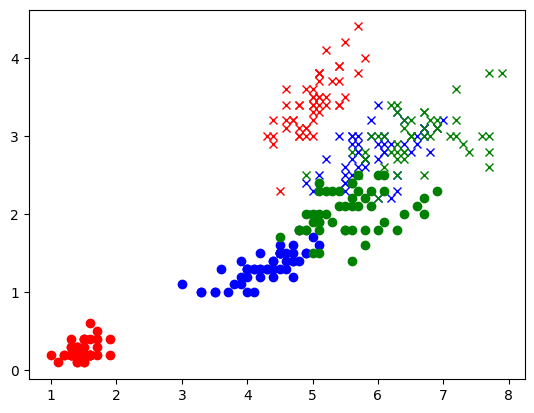

In [32]:
# Chart

# Setosa
plt.plot(x_setosa_sepal_length, y_setosa_sepal_width, "rx")
plt.plot(x_setosa_petal_length, y_setosa_petal_width, "ro")

# Versicolor
plt.plot(x_Versicolor_sepal_length, y_Versicolor_sepal_width, "bx")
plt.plot(x_Versicolor_petal_length, y_Versicolor_petal_width, "bo")

# Virginica
plt.plot(x_Virginica_sepal_length, y_Virginica_sepal_width, "gx")
plt.plot(x_Virginica_petal_length, y_Virginica_petal_width, "go")